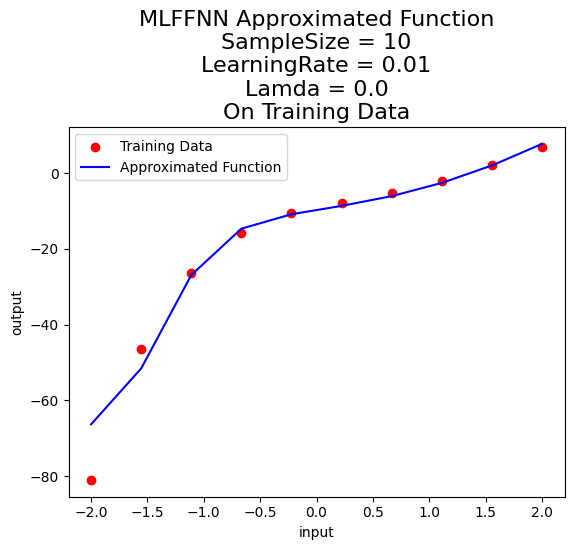

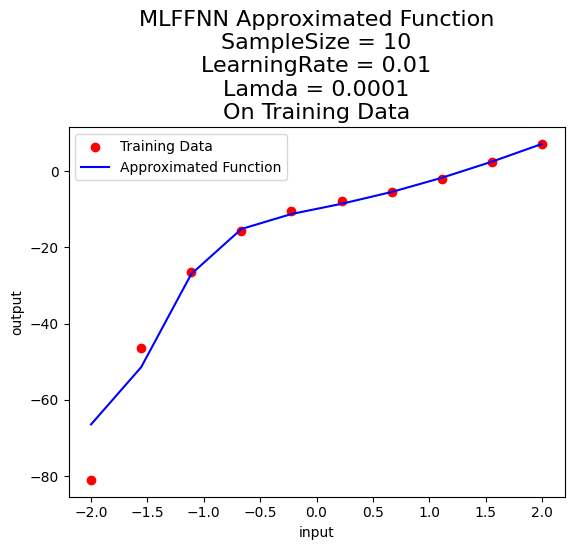

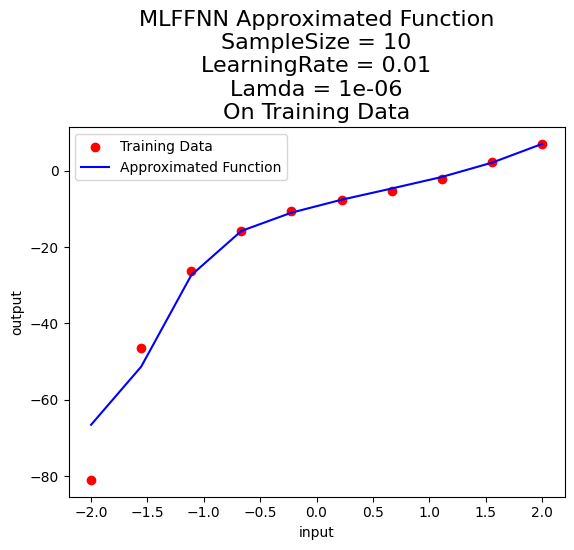

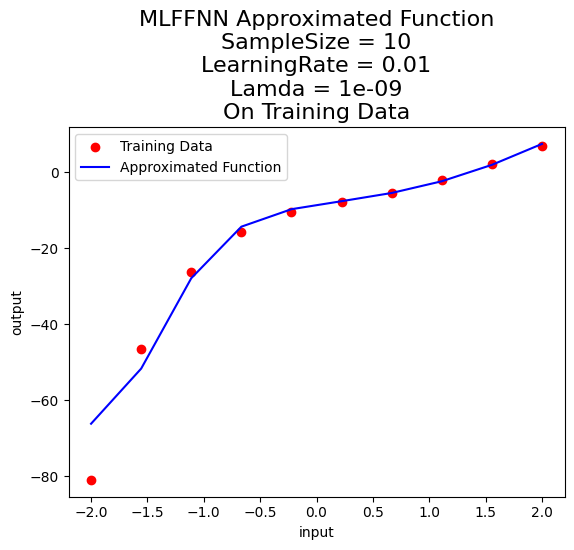

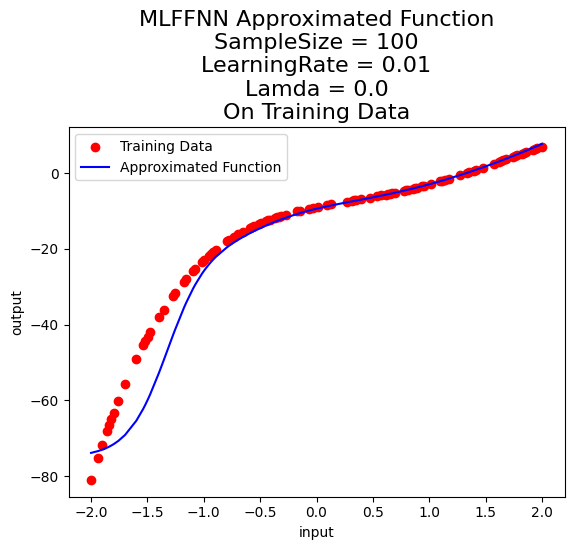

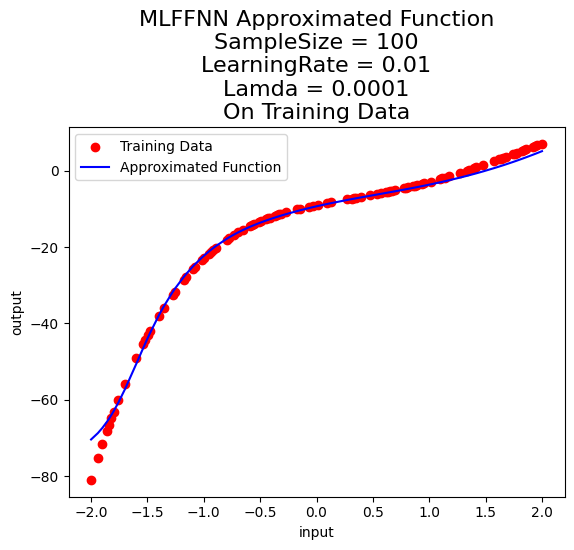

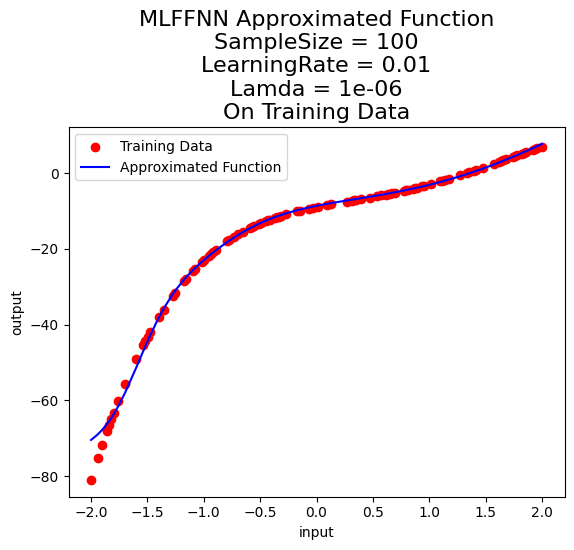

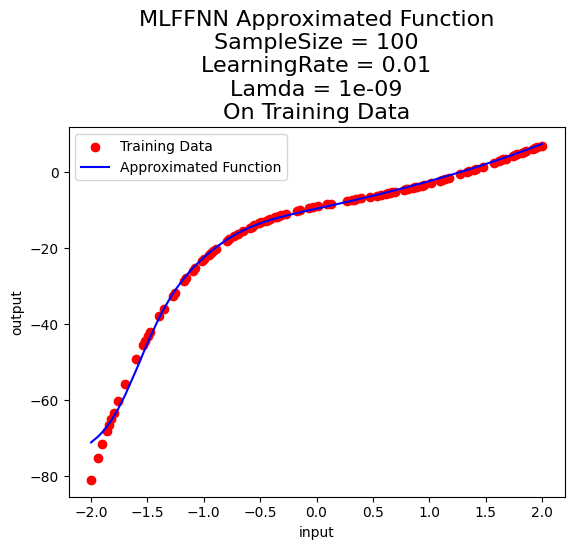

Index Sample Size  Learning Rate            λ  Train Erms  Validate Erms  Test Erms
    1          10           0.01 0.000000e+00   34.066423      27.711014  29.064954
    2          10           0.01 1.000000e-04   34.101202      27.822354  29.103146
    3          10           0.01 1.000000e-06   34.150275      27.924567  29.107577
    4          10           0.01 1.000000e-09   34.153827      27.847973  29.206869
    5         100           0.01 0.000000e+00   31.407732      30.345579  32.457431
    6         100           0.01 1.000000e-04   28.373361      27.738458  28.202897
    7         100           0.01 1.000000e-06   28.816095      28.023825  28.744003
    8         100           0.01 1.000000e-09   29.016430      28.229088  28.944310


In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

column_names = [
    "Index",
    "Sample Size",
    "Learning Rate",
    "λ",
    "Train Erms",
    "Validate Erms",
    "Test Erms",
]
table_index = 0
table_df = pd.DataFrame(columns=column_names)

def build_and_train_model(train_x, train_y, val_x, val_y, learning_rate, lamda):
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='tanh', kernel_regularizer=tf.keras.regularizers.L1(lamda), input_shape=(1,)),
            tf.keras.layers.Dense(1, activation='linear')
        ])
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=100, verbose=0)

    return model

def evaluate_model(model, x, y):

    y_pred = model.predict(x, verbose=0)

    return y_pred

def add_data_to_table(sample_size, learning_rate, lamda, train_erms, validate_erms, test_erms):
    row_data = {}
    global table_df
    global table_index
    table_index = table_index + 1
    row_data["Index"] = table_index
    row_data["Sample Size"] = sample_size
    row_data["Learning Rate"] = learning_rate
    row_data["λ"] = lamda
    row_data["Train Erms"] = train_erms
    row_data["Validate Erms"] = validate_erms
    row_data["Test Erms"] = test_erms
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        table_df = pd.concat(
            [table_df, pd.DataFrame(row_data, index=[0])], ignore_index=True
        )


def print_table():
    print(table_df.to_string(index=False))

def get_N(x):
    N = len(x)
    return N

def get_erms(y, t):
    y_mse = tf.reduce_mean(tf.square(t-y))
    erms = np.sqrt(y_mse)
    return erms

def plot_data(x, y, pred_y, x_color, y_color, scatter_label, plot_label, x_label, y_label, plot_title):
    
    plt.scatter(x, y, color=x_color, label=scatter_label)
    plt.plot(x, pred_y, color=y_color, label=plot_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title, fontsize=16)
    plt.legend()
    current_directory = os.getcwd()
    os.makedirs(current_directory + "/reg_1", exist_ok=True)
    plt.savefig(current_directory + "/reg_1/" + plot_title + ".png")
    plt.show()

def scatter_plot(x, y, x_label, y_label, plot_title, plot_color):
    plt.scatter(x, y, color=plot_color, label=plot_title)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()


def line_plot(polyline, y, plot_label, plot_color, lines):
    plt.plot(polyline, y, color=plot_color, label=plot_label, linestyle=lines)
    plt.legend()

def plot_all_data(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate, lamda):
    
    title = "MLFFNN Approximated Function\nSampleSize = " + str(sample_size) + "\nLearningRate = " + str(learning_rate) + "\nLamda = "+str(lamda)+"\nOn "
    plot_data(train_x, train_y, train_y_pred, 'r', 'b', 'Training Data', 'Approximated Function', 'input', 'output', title+'Training Data')
        
def plot_graphs(train_x, train_y, val_x, val_y, test_x, test_y, sample_size, regularization_coefficients, learning_rate=0.1):

    for lamda in regularization_coefficients:
        model = build_and_train_model(train_x, train_y, val_x, val_y, learning_rate, lamda)
        
        train_y_pred = evaluate_model(model, train_x, train_y)
        val_y_pred = evaluate_model(model, val_x, val_y)
        test_y_pred = evaluate_model(model, test_x, test_y)
        
        train_erms = get_erms(train_y_pred, train_y)
        validate_erms = get_erms(val_y_pred, val_y)
        test_erms = get_erms(test_y_pred, test_y)
        
        plot_all_data(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate, lamda)
        
        add_data_to_table(sample_size, learning_rate, lamda, train_erms, validate_erms, test_erms)


def main():
    folder_number = "18"
    current_directory = os.getcwd()
    regression_dataset_1_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 1/"+folder_number+"/"
    
    regression_dataset_1_Train_Sample_1 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-1.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_1)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_1 = sorted_data[:, 1]
    train_y_1 = sorted_data[:, 2]

    regression_dataset_1_Train_Sample_2 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-2.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_2)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_2 = sorted_data[:, 1]
    train_y_2 = sorted_data[:, 2]


    regression_dataset_1_validation = (
        regression_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_validation)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    val_x = sorted_data[:, 1]
    val_y = sorted_data[:, 2]

    regression_dataset_1_test = (
        regression_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_test)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    test_x = sorted_data[:, 1]
    test_y = sorted_data[:, 2]

    learning_rates = [0.01]
    regularization_coefficients = [0.0, 0.0001, 1e-6, 1e-9]

    sample_size = get_N(train_x_1)
    for learning_rate in learning_rates:
        plot_graphs(
            train_x_1,
            train_y_1,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            regularization_coefficients,
            learning_rate,
        )

    sample_size = get_N(train_x_2)
    for learning_rate in learning_rates:
        plot_graphs(
            train_x_2,
            train_y_2,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            regularization_coefficients,
            learning_rate,
        )

    print_table()


if __name__ == "__main__":
    main()